# Basic statistics

In [ ]:
import numpy

We can use Python as simple interactive calculator:

In [ ]:
2 + 3 + 4

9

Here we call the `sqrt` function from the numpy library.

In [ ]:
numpy.sqrt(2 + 2)

2.0

Some useful constants are predefined.

In [ ]:
numpy.pi

3.141592653589793

In [ ]:
numpy.sin(numpy.pi)

1.2246467991473532e-16

The notation `e-16` above means $10^{-16}$; the number above is very very small (it’s a numerical approximation to the mathematical answer of zero).

We can generate a random number from a uniform distribution between 20 and 30. If you evaluate this several times it will generate a different random number each time.

In [ ]:
numpy.random.uniform(20, 30)

27.022229137885553

In [ ]:
numpy.random.uniform(20, 30)

25.261854070126805

We can generate an **array** of random numbers by passing a third argument to the `numpy.random.uniform` function, saying how many random numbers we want. We store the array in a *variable* named `obs`.

In [ ]:
obs = numpy.random.uniform(20, 30, 10)
obs

array([20.27652228, 29.66009427, 29.9078479 , 23.06272785, 28.43373025,
       29.8991352 , 23.8239497 , 26.47207121, 28.14558468, 24.80539641])

The builtin function `len` in Python tells us the length of an array or a list.

In [ ]:
len(obs)

10

We can do arithmetic on arrays, adding them together or subtracting a constant from each element.

In [ ]:
obs + obs

array([40.55304456, 59.32018854, 59.8156958 , 46.12545569, 56.86746049,
       59.79827041, 47.6478994 , 52.94414242, 56.29116936, 49.61079283])

In [ ]:
obs - 25

array([-4.72347772,  4.66009427,  4.9078479 , -1.93727215,  3.43373025,
        4.8991352 , -1.1760503 ,  1.47207121,  3.14558468, -0.19460359])

We can apply a numpy function to all the elements of an array. 

In [ ]:
numpy.sqrt(obs)

array([4.50294596, 5.44610818, 5.46880681, 4.8023669 , 5.33232878,
       5.46801017, 4.88097835, 5.14510167, 5.30524125, 4.98050162])

The array has *methods*, a kind of function that acts on the array.

In [ ]:
obs.mean()

26.448705974453226

In [ ]:
obs.sum()

264.48705974453225

In [ ]:
obs.min()

20.276522277890415

# Simple plotting

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("bmh")  # this affects the style (colors etc.) of plots

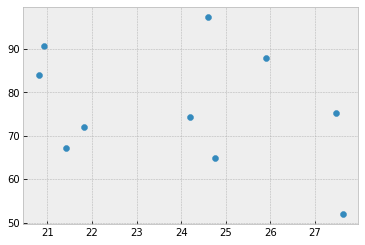

In [ ]:
X = numpy.random.uniform(20, 30, 10)
Y = numpy.random.uniform(50, 100, 10)
plt.scatter(X, Y);

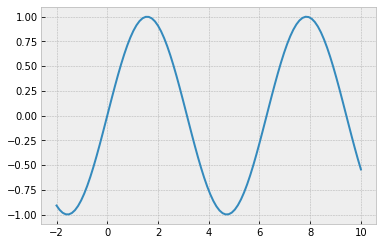

In [ ]:
x = numpy.linspace(-2, 10, 100)
plt.plot(x, numpy.sin(x));

We can add two vectors together, assuming that all their dimensions are identical. Our array $x$ has one dimension of size 100. We can add another random vector of size 100 to it, containing numbers drawn from a uniform probability distribution between -0.1 and 0.1 (these represent some random “noise” which is added to our sine curve).

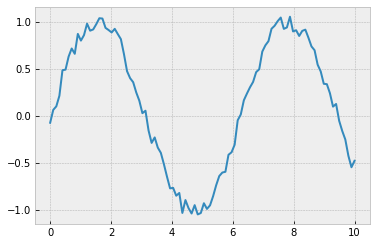

In [ ]:
x = numpy.linspace(0, 10, 100)
obs = numpy.sin(x) + numpy.random.uniform(-0.1, 0.1, 100)
plt.plot(x, obs);

The **central limit theorem** states that the sum of a number of independent random variables tends toward a normal distribution even if the original variables themselves are not normally distributed. We illustrate this result by examining the distribution of the sums of 1000 realizations of a uniformly distributed random variable, plotting the distribution as a histogram. 

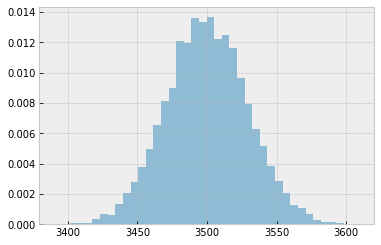

In [ ]:
N = 10_000
sim = numpy.zeros(N)
for i in range(N):
    sim[i] = numpy.random.uniform(30, 40, 100).sum()
plt.hist(sim, bins=40, alpha=0.5, density=True); 

# Probability distributions

In [ ]:
import numpy
import scipy.stats
import matplotlib.pyplot as plt
plt.style.use("bmh")

## Uniform distribution

Let’s generate 5 random variates from a continuous uniform distribution between 90 and 100 (the first argument to the `scipy.stats.uniform` function is the lower bound, and the second argument is the width). The object `u` will contain the “frozen distribution”.

In [ ]:
u = scipy.stats.uniform(90, 10)
u.rvs(5)

array([90.18933833, 96.39811551, 92.67806715, 91.00430901, 92.56185313])

Let’s check that the expected value of the distribution is around 95.

In [ ]:
u.rvs(1000).mean()

94.84318414034254

Let’s check that around 20% of the variates are less than 92.

In [ ]:
(u.rvs(1000) < 92).sum() / 1000.0

0.203

We can also use the `stats` module of the [SymPy](https://sympy.org/) library to obtain the same information using an analytical (rather than stochastic) method.

In [ ]:
import sympy.stats

u = sympy.Symbol("u")
u = sympy.stats.Uniform(u, 90, 100)
# generate one random variate
sympy.stats.sample(u)

/usr/local/lib/python3.7/dist-packages/sympy/stats/rv.py:1104: UserWarning: 
The return type of sample has been changed to return an iterator
object since version 1.7. For more information see
https://github.com/sympy/sympy/issues/19061
  warnings.warn(filldedent(message))


<generator object sample_iter.<locals>.return_generator_finite at 0x7fd83efbf850>

Check that the expected value (the mean of the distribution) is 95.

In [ ]:
sympy.stats.E(u)

95

The probability of a random variate being less than 92:

In [ ]:
sympy.stats.P(u < 92)

1/5

## Gaussian distribution

Consider a Gaussian (normal) distribution centered in 5, with a standard deviation of 1.

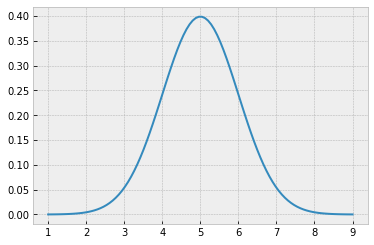

In [ ]:
norm = scipy.stats.norm(5, 1)
x = numpy.linspace(1, 9, 100)
plt.plot(x, norm.pdf(x));

In [ ]:
norm.mean()

5.0

Check that half the distribution is located to the left of 5.

In [ ]:
norm.cdf(5)

0.5

In [ ]:
norm.ppf(0.5)

5.0

Find the first percentile of the distribution (the value of $x$ which has 1% of realizations to the left). Check that it is also equal to the 99% survival quantile.

In [ ]:
norm.ppf(0.01)

2.6736521259591592

In [ ]:
norm.isf(0.99)

2.6736521259591592

In [ ]:
norm.cdf(norm.isf(0.99))

0.01

## Central limit theorem

The central limit theorem states that the mean of a set of random measurements will tend to a normal distribution, no matter the shape of the original measurement distribution. The property is also true of the sum of a set of random measurements. Let's test that in Python, simulating measurements from a uniform distribution between 30 and 40.

Procedure: take 100 measurements from the $U(30, 40)$ distribution, and calculate their mean. Repeat this 10000 times and plot a histogram of the means, which should be normally distributed.

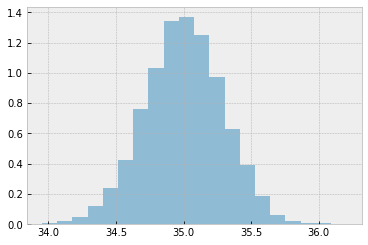

In [ ]:
N = 10000
sim = numpy.zeros(N)
for i in range(N):
    sim[i] = numpy.random.uniform(30, 40, 100).mean()
plt.hist(sim, bins=20, alpha=0.5, density=True);

## Exponential distribution

The exponential distribution is often used in reliability engineering to represent failure of equipment which is not exposed to wear. The **hazard function**, or failure rate, of the exponential distribution is constant, equal to $\lambda$. Let's check the property that the expected value (or mean) of an exponential random variable is $\frac{1}{\lambda}$.

In [ ]:
lbda = 25
obs = scipy.stats.expon(scale=1/float(lbda)).rvs(size=1000)
# the mean of 1000 random variates from the exponential distribution 
obs.mean()

0.0394926737065791

In [ ]:
1/float(lbda)

0.04

Indeed, those are quite close! Let’s check another property of the exponential distribution: that the variance is equal to $\lambda^{-2}$.

In [ ]:
obs.var()

0.0016016785671768984

In [ ]:
1/float(lbda)**2

0.0016

And of course since the standard deviation is the square root of the variance, it should be equal to the expected value.

In [ ]:
obs.std()

0.0400209765894949

As previously, we can also check these properties analytically, using the SymPy symbolic mathematics library, starting with the expected value:

In [ ]:
exp = sympy.Symbol("exp")
exp = sympy.stats.Exponential(exp, lbda)
sympy.stats.E(exp)

1/25

In [ ]:
# now check that the variance is lambda ^ -2
sympy.stats.variance(exp) - lbda**-2

0

In [ ]:
# check that the standard deviation is equal to the expectation
sympy.stats.std(exp) - sympy.stats.E(exp)

0

# Coins and dice

In [ ]:
%matplotlib inline

import numpy
import scipy.stats
import matplotlib.pyplot as plt
plt.style.use("bmh")
numpy.set_printoptions(threshold=20)

When undertaking statistical analyses, it can be important for your results to be *reproducible*, meaning that you obtain the same results each time you run the analysis. The pseudorandom number generator used by NumPy generates long sequences of outputs that are fully determined by the *seed* of the generator (if you use the same seed, you will obtain the same results each time you run the notebook). In default setting, the seed is taken from some unpredictable feature of the computer environment (such as the `/dev/random` device on a Linux/Unix computer), so sucessive runs will generate different results. If you want a reproducible notebook, you can set the random seed explicitly. 

## Coin Toss Experiment

In [ ]:
numpy.random.seed(42)

Let’s **simulate a coin toss** by a random choice between the numbers 0 and 1 (say 0 represents tails and 1 represents heads). Note that the second argument to `randint` is an *exclusive* upper bound.

In [ ]:
numpy.random.randint(0, 2)

0

Let’s toss two coins, which gives as an array with the result of the first and second toss.

In [ ]:
numpy.random.randint(0, 2, 2)

array([1, 0])

The number of heads when tossing a coin twice is simply the sum of that array.

In [ ]:
numpy.random.randint(0, 2, 2).sum()

0

**Task**: simulate the *number of heads when tossing a coin twice*. Do this 1000 times, calculate the expected value of the number of heads, and plot the distribution of results (the Probability Mass Function).

In [ ]:
N = 1000
heads = numpy.zeros(N, dtype=int)
for i in range(N):
    heads[i] = numpy.random.randint(0, 2, 2).sum()
heads

array([1, 0, 1, ..., 0, 2, 2])

The **expected value** (or mathematical expectation) of the number of heads is simply the mean of our observations (it’s what happens “on average”). 

In [ ]:
heads.mean()

0.987

Now let’s look at the **distribution** of the number of heads obtained. Let’s count how many times we have scored 0, 1 or 2 in our 1000 simulations, using the `unique` function from `numpy`, then plot that probability mass function. 

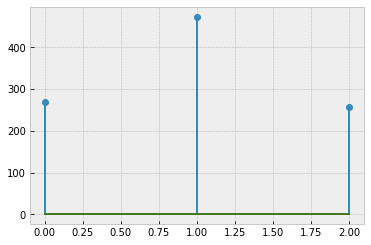

In [ ]:
values, counts = numpy.unique(heads, return_counts=True)
plt.stem(values, counts, use_line_collection=True)
plt.show()

## Expected value of a dice roll

The expected value of a dice roll is 

$$\sum_{i=1}^6 i \times \frac{1}{6} = 3.5$$

That means that if we toss a dice a large number of times, the mean value should converge to 3.5. Let’s check that empirically by running a simulation in Python.

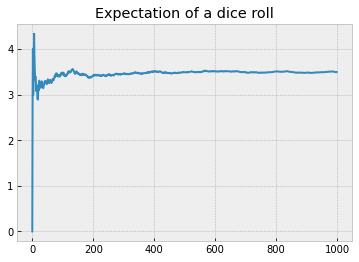

In [ ]:
N = 1000
roll = numpy.zeros(N, dtype=int)
expectation = numpy.zeros(N)
for i in range(N):
    roll[i] = numpy.random.randint(1, 7)
for i in range(1, N):
    expectation[i] = numpy.mean(roll[0:i])
plt.plot(expectation)
plt.title("Expectation of a dice roll")
plt.show()

The sympy.stats module has functionality that allows us to evaluate the expected value analytically. 

In [ ]:
D = sympy.stats.Die("D", 6)
sympy.stats.E(D)

7/2

## Simulating dice throws

In [ ]:
dice = scipy.stats.randint(1, 7)
dice.rvs(1000).max()

6

We simulated a thousand dice throws, and never rolled anything bigger than a 6 (that’s reassuring!).

What is the probability of a die rolling 4?

In [ ]:
dice.pmf(4)

0.16666666666666666

What is the probability of rolling 4 or below?

In [ ]:
dice.cdf(4)

0.6666666666666666

What is the probability of rolling between 2 and 4 (inclusive)?

In [ ]:
dice.cdf(4) - dice.cdf(1)

0.5

Again, using `sympy.stats` to calculate this analytically:

The probability of a dice roll of 4:

In [ ]:
sympy.stats.P(sympy.Eq(D, 4))

1/6

Probability of rolling 4 or below:

In [ ]:
sympy.stats.P(D <= 4)

2/3

Probability of rolling between 2 and 4 (inclusive):

In [ ]:
sympy.stats.P(sympy.And(D >= 2, D <= 4))

1/2

Now let’s look at what happens when we roll **three dice**. We’ll estimate the expected value and the probability mass function for the sum of three dice.  

In [ ]:
N = 10_000
roll = numpy.zeros(N, dtype=int)
for i in range(N):
    roll[i] = scipy.stats.randint(1, 7).rvs(3).sum()
roll.mean()

10.5018

We can plot the probability mass function for the sum of three dice:

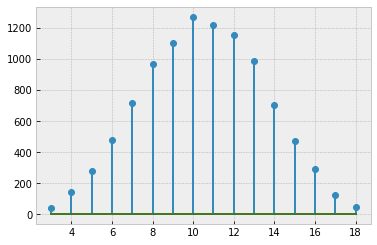

In [ ]:
values, counts = numpy.unique(roll, return_counts=True)
plt.stem(values, counts, use_line_collection=True)
plt.show()

## The last banana thought experiment

Consider the following [thought experiment in probability by Leonardo Barichello](https://ed.ted.com/lessons/the-last-banana-a-thought-experiment-in-probability-leonardo-barichello): Two people are stranded on an island with only one banana to eat. To decide who gets it, they agree to play a game. Each of them will roll a fair 6-sided dice. If the largest number rolled is a 1, 2, 3, or 4, then Player 1 gets the banana. If the largest number rolled is a 5 or 6, then Player 2 gets it. Which player has the better chance?

If we are not entirely convinced by our intuition concerning the banana, we can simulate this situation a large number of times, using a stochastic simulation (or Monte Carlo) approach:

In [ ]:
N = 1000
player1 = 0
for i in range(N):
    # the second argument to randint is an exclusive upper bound
    roll1 = scipy.stats.randint(1, 7).rvs(1)
    roll2 = scipy.stats.randint(1, 7).rvs(1)
    if max(roll1, roll2) <= 4:
        player1 += 1
player1 / float(N)

0.445

The situation is also easy to resolve analytically: Player 1 gets the banana when both the dice rolls are smaller than 5. The probability of a roll smaller than 5 is 4/6, the two dice rolls are independent events, so their combined probability is the product of their individual probabilities: Player 1 gets the banana with probability

In [ ]:
4/6 * 4/6

0.4444444444444444

## The gambles of the Chevalier de Méré

Let’s analyze two problems which were discussed between Antoine Gombaud, chevalier de Méré, a passionate gambler, and the mathematician Blaise Pascal. This discussion was a little daring for the time, because it went against established doctrine of the Catholic church that people should not attempt to predict the future (an activity that was reserved for the deity). The discussion and collaboration of Pascal with another mathematician, Pierre de Fermat, helped in the development of probability theory.

The **first problem**: *is it a good idea to gamble on the appearance of at least one 6 when a dice is thrown 4 times*?

The probability of losing this gamble is easy to calculate analytically: each throw has 5 chances out of 6 of not seeing a 6, and the events are independent. So the probability of winning is

In [ ]:
1 - (5/6.0)**4

0.5177469135802468

The probability of winning is greater than 0.5. We can also check this problem with SymPy:

In [ ]:
import sympy.stats

D1 = sympy.stats.Die("D1", 6)
D2 = sympy.stats.Die("D2", 6)
D3 = sympy.stats.Die("D3", 6)
D4 = sympy.stats.Die("D4", 6)

sympy.stats.P(sympy.Or(D1 > 5, sympy.Or(D2 > 5, sympy.Or(D3 > 5, D4 > 5)))) + 0.0

0.517746913580247

The **second problem**: *is it a good idea to gamble on the appearance of at least one double six when two dice are thrown 24 times*? 

The probability of losing this gamble is also easy to calculate: there are 35 chances out of 36 (6 * 6) of not seeing a double 6 on each double throw, so the probability of winning is

In [ ]:
1 - (35/36.0)**24

0.4914038761309034

So this is not a good gamble. We can also calculate this analytically with SymPy, by modelling a Binomial random variable:

In [ ]:
A = sympy.stats.Die("A", 6)
B = sympy.stats.Die("B", 6)
doublesix = sympy.stats.Binomial("DoubleSix", 24, sympy.stats.P(sympy.And(A > 5, B > 5)))
sympy.stats.P(doublesix >= 1) + 0.0

0.491403876130903

**Exercise**: write some Python code to simulate this gamble and check that you obtain a similar probability. 

## Pepys and Newton

Samuel Pepys was a great diarist of the English language and a friend of Isaac Newton’s. Pepys was a gambler and [wrote to Newton](https://en.wikipedia.org/wiki/Newton%E2%80%93Pepys_problem) to ask which of three events is the most likely:

1. at least one six comes up when six fair dice are rolled;
2. at least two sixes come up when 12 dice are rolled;
3. at least three sixes come up when 18 dice are rolled.

Now Newton wasn’t able to use Python, and spent a while working out the answers, but we can [stand on the shoulders of giants](https://en.wikipedia.org/wiki/Standing_on_the_shoulders_of_giants) and figure this out quite easily.  

**Possibility 1**: the probability of rolling at least one six is 1 minus the probability of zero sixes, which is

In [ ]:
1 - (5/6.0)**6

0.6651020233196159

**Possibility 2**: the probability of at least two sixes is 1 minus the probability of zero sixes, minus the probability of a single six. The probability of zero sixes is easy to calculate; here are two ways of calculating it.

In [ ]:
# throw a non-6 12 times
(5/6.0)**12

0.11215665478461515

In [ ]:
# probability mass at 0 of a binomial distribution with n=12, p=1/6
scipy.stats.binom(12, 1/6.0).pmf(0)

0.11215665478461515

so the final answer is

In [ ]:
roll12 = scipy.stats.binom(12, 1/6.0)
1 - roll12.pmf(0) - roll12.pmf(1)

0.6186673737323087

**Possibility 3**: in the same way, the probability of at least three sixes when rolling 18 dice is one minus the probability of zero sixes, minus the probability of one six, minus the probability of two sixes.

In [ ]:
roll18 = scipy.stats.binom(18, 1/6.0)
1 - roll18.pmf(0) - roll18.pmf(1) - roll18.pmf(2)

0.5973456859477231

In [ ]:
1 - roll18.cdf(2)

0.5973456859477229

# Simulating Earthquake Occurences

Suppose we live in an area where there are typically 0.03 earthquakes of intensity 5 or more per year.
Assume earthquake arrival is a Poisson
process \\
• interval between earthquakes follows an exponential distribution \\
• events are independent \\

Simulate the random intervals between the next earthquakes of intensity 5 or greater \\
What is the 25th percentile of the interval between 5+ earthquakes?

In [ ]:
from scipy.stats import expon

In [ ]:
expon(scale=1/0.03).rvs(size=15)

array([18.72042316,  7.29412722, 57.55379103,  2.79842692, 66.91281968,
       28.9585067 , 20.45573374, 26.59784103, 15.72599375,  4.55069637,
       48.39735626, 87.6620666 , 99.90285505, 37.02736772, 17.60739247])

In [ ]:
expon(scale=1/0.03).ppf(0.25) # answer is “around 10 years”

9.589402415059364